In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

Our dataset have no null values

<AxesSubplot:>

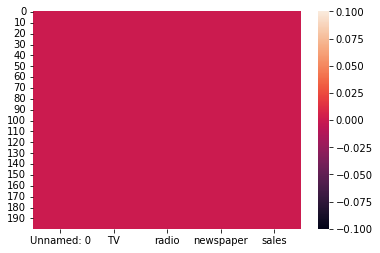

In [6]:
sns.heatmap(df.isnull())

Here we can drop unknown column as it has no role in our dataset

In [7]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

# Univarient Analysis

<AxesSubplot:xlabel='TV', ylabel='Density'>

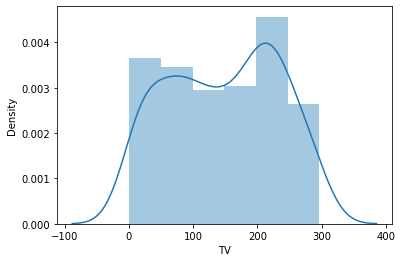

In [8]:
sns.distplot(df['TV'])

we can find that data is right skewed

<AxesSubplot:xlabel='radio', ylabel='Density'>

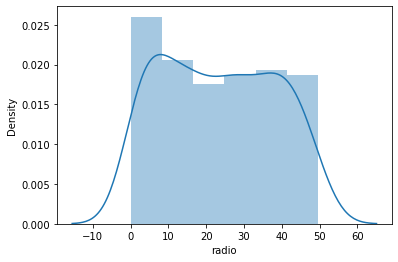

In [9]:
sns.distplot(df['radio'])

we can infer that data is right skewed

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

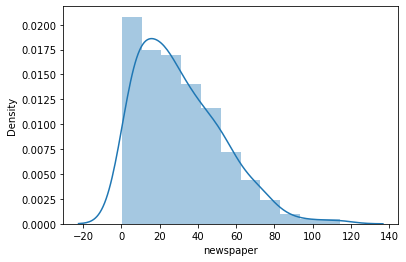

In [10]:
sns.distplot(df['newspaper'])

we can infer that data is left skewed

<AxesSubplot:xlabel='sales', ylabel='Density'>

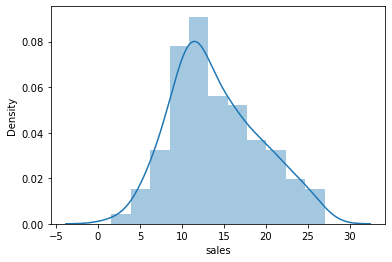

In [11]:
sns.distplot(df['sales'])

we can infer that daata distribution is normal

# Bivarient Analysis

<AxesSubplot:xlabel='TV', ylabel='sales'>

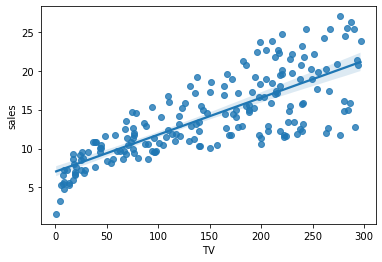

In [12]:
sns.regplot(x='TV',y='sales',data=df)

we can infer that 'TV' and 'sales' are directly proportional

<AxesSubplot:xlabel='radio', ylabel='sales'>

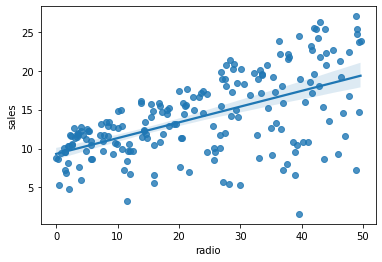

In [13]:
sns.regplot(x='radio',y='sales',data=df)

we can infer that as 'sales' increases 'radio' also increases to some extent excluding few points

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

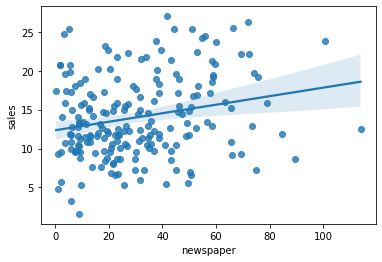

In [14]:
sns.regplot(x='newspaper',y='sales',data=df)

we can infer that  as 'sales' values increases 'newspaper' remains at same point, we can see that newspaper doesnot contibute in increase in sales compared to 'TV' and 'radio'

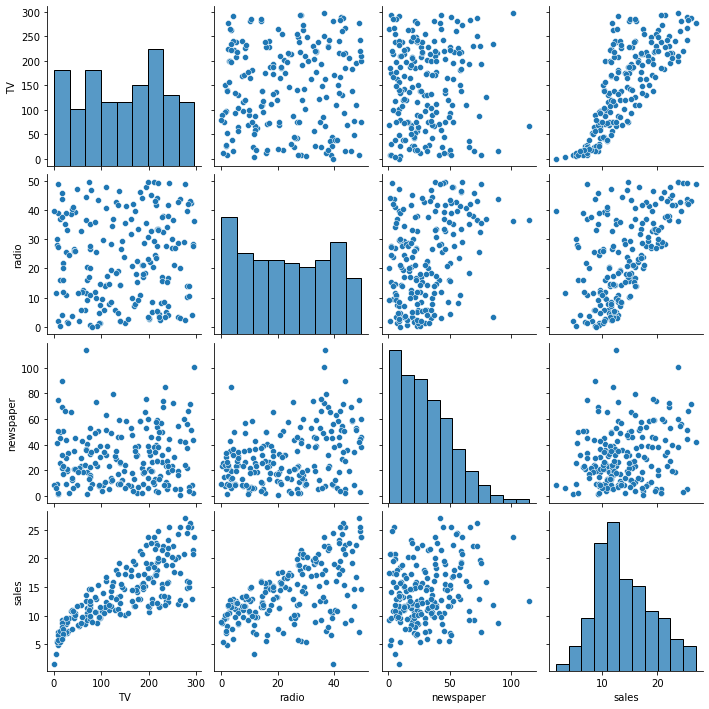

In [15]:
sns.pairplot(df)

In [16]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Key Observations:

1. In all the columns there ia large differeence between 75% and maximun value which means outliers amy be present

2. Difference between 25%, 50%,75% is not same in 'TV', 'radio','newspaper' column which means skewness is present in these columns

# Correlation:

In [17]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


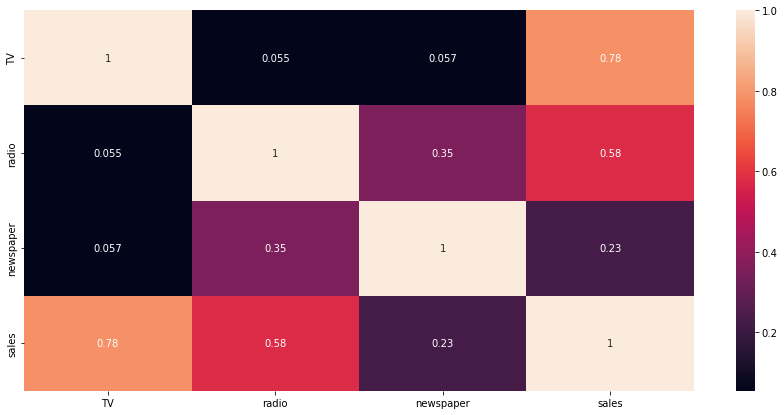

In [18]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

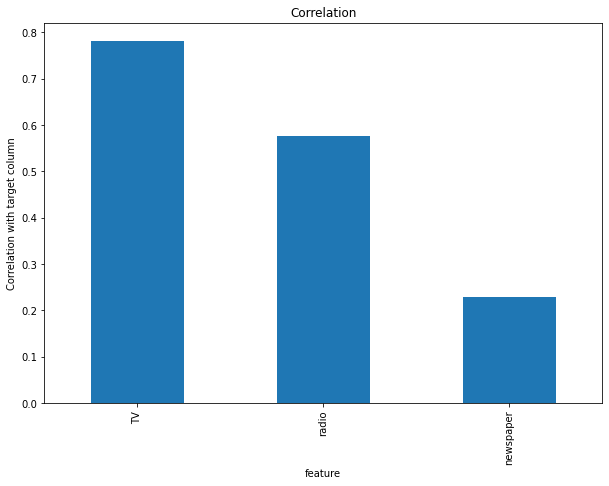

In [19]:
plt.figure(figsize=(10,7))
df.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot.bar()
plt.xlabel("feature")
plt.ylabel("Correlation with target column")
plt.title("Correlation")
plt.show()

# Key Observation:

Here all columns are positively correlated

1. 'TV' column is 78% correlated with sales which is good

2. 'radio' column is 58% correlated with sales which is good

3. 'newspaper' column is 23% correlated with sales which is also doing well.

# Skewness:

In [20]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

# Key Observations:

By keep the value of skewness as +/- 0.5 we can find 'TV','radio','newspaper' columns have skewness

Skewness-- Representing Graphically

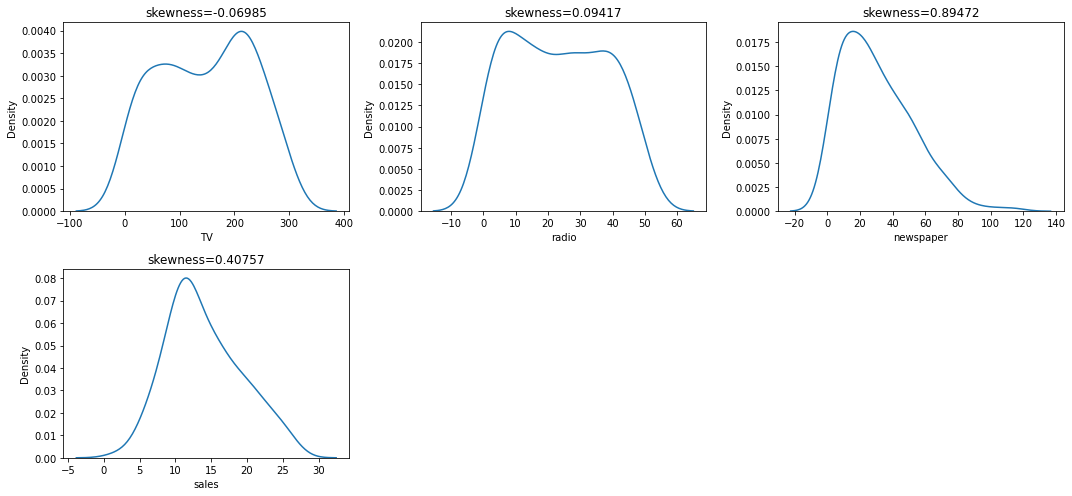

In [21]:
plt.figure(figsize=(15,7))
collist = df.columns.values #taking all the values in each column
for i in range(0,len(collist)):
    plt.subplot(2,3,i+1)
    sns.kdeplot(df[collist[i]])
    plt.title(f"skewness={round(df[collist[i]].skew(),5)}")
    plt.tight_layout()

we will remove skewness now by 'power transform' method

In [22]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [23]:
x.shape

(200, 3)

In [24]:
y.shape

(200,)

In [25]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x,method='yeo-johnson')
x_new

array([[ 0.94867429,  0.96224689,  1.51433531],
       [-1.19131426,  1.0401788 ,  0.78768252],
       [-1.6477566 ,  1.37070964,  1.51699753],
       [ 0.14102023,  1.14238689,  1.21465643],
       [ 0.45271493, -0.74865064,  1.21170398],
       [-1.82382233,  1.51501853,  1.66502354],
       [-1.00249116,  0.69372704, -0.1077535 ],
       [-0.210275  , -0.10158544, -0.84409341],
       [-1.82609501, -1.63345378, -2.13259669],
       [ 0.64764492, -1.56676988, -0.22900395],
       [-0.88377378, -1.20298758, -0.07226156],
       [ 0.79708355,  0.18072579, -1.60261898],
       [-1.52641627,  0.81900563,  1.42512925],
       [-0.48036844, -1.02813642, -1.22982506],
       [ 0.69106577,  0.6992403 ,  0.81860579],
       [ 0.60295713,  1.45770359,  1.04432344],
       [-0.86079972,  0.89906999,  2.52943514],
       [ 1.4355201 ,  1.05563142,  1.13383286],
       [-0.84199328, -0.04209908, -0.39356015],
       [ 0.09508551,  0.17453165, -0.34671544],
       [ 0.8337607 ,  0.40367061,  1.059

In [26]:
pd.DataFrame(x_new).skew().sort_values(ascending=False)

2   -0.077942
1   -0.242968
0   -0.315199
dtype: float64

In [27]:
x = pd.DataFrame((x_new),columns = x.columns)

# Outliers deteection:

TV              AxesSubplot(0.125,0.536818;0.227941x0.343182)
radio        AxesSubplot(0.398529,0.536818;0.227941x0.343182)
newspaper    AxesSubplot(0.672059,0.536818;0.227941x0.343182)
sales              AxesSubplot(0.125,0.125;0.227941x0.343182)
dtype: object

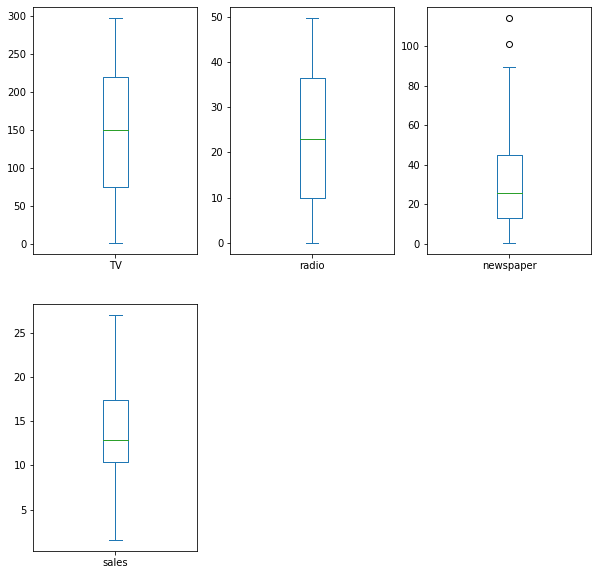

In [28]:
df.plot(kind='box',subplots=True,layout=(2,3),figsize=(10,10))

# Key Observation:

From visualization we can find outliers is present in 'newspaper' column

# Removing Outliers

In [29]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [30]:
df_new = df[(z<3).all(axis=1)]
df_new.shape

(198, 4)

In [31]:
print("Old DataFrame : ",df.shape)
print("New DataFrame : ",df_new.shape)
print("Total rows dropped : ",df.shape[0] - df_new.shape[0])

Old DataFrame :  (200, 4)
New DataFrame :  (198, 4)
Total rows dropped :  2


# Percentage loss

In [32]:
percentage_loss = (200-198)/200*100
percentage_loss

1.0

# Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [34]:
x

array([[ 0.94867429,  0.96224689,  1.51433531],
       [-1.19131426,  1.0401788 ,  0.78768252],
       [-1.6477566 ,  1.37070964,  1.51699753],
       [ 0.14102023,  1.14238689,  1.21465643],
       [ 0.45271493, -0.74865064,  1.21170398],
       [-1.82382233,  1.51501853,  1.66502354],
       [-1.00249116,  0.69372704, -0.1077535 ],
       [-0.210275  , -0.10158544, -0.84409341],
       [-1.82609501, -1.63345378, -2.13259669],
       [ 0.64764492, -1.56676988, -0.22900395],
       [-0.88377378, -1.20298758, -0.07226156],
       [ 0.79708355,  0.18072579, -1.60261898],
       [-1.52641627,  0.81900563,  1.42512925],
       [-0.48036844, -1.02813642, -1.22982506],
       [ 0.69106577,  0.6992403 ,  0.81860579],
       [ 0.60295713,  1.45770359,  1.04432344],
       [-0.86079972,  0.89906999,  2.52943514],
       [ 1.4355201 ,  1.05563142,  1.13383286],
       [-0.84199328, -0.04209908, -0.39356015],
       [ 0.09508551,  0.17453165, -0.34671544],
       [ 0.8337607 ,  0.40367061,  1.059

# Training Model

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score

acc = 0
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=i,test_size=.20)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    temp = r2_score(y_test,y_pred)
    if temp > acc:
        acc = temp
        best_rstate = i
print("accuracy: ", acc ,"random state:" ,best_rstate)



accuracy:  0.9510185122247254 random state: 672


In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=672,test_size=.20)

In [56]:
x_train.shape

(160, 3)

In [57]:
y_train.shape

(160,)

In [58]:
x_test.shape

(40, 3)

In [59]:
y_test.shape

(40,)

In [60]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate

In [61]:
lr = LinearRegression()
la = Lasso()
Ri = Ridge()
En = ElasticNet()
Kn = KNeighborsRegressor()
Dt = DecisionTreeRegressor()
Rf = RandomForestRegressor()
Ab = AdaBoostRegressor()

model = [lr,la,Ri,En,Kn,Dt,Rf,Ab] 

In [62]:
score=[]
mae=[]
mse=[]
r2=[]

for m in model:
    m.fit(x_train,y_train)
    #m.score(x_train,y_train)
    print("Accuracy_score of ", m, "is : ",m.score(x_train,y_train))
    score.append(m.score(x_train,y_train))
    predm = m.predict(x_test)
    print('\n')
    
    print("Mean Absolute error: ",mean_absolute_error(y_test,predm))
    mae.append(mean_absolute_error(y_test,predm))
    print("Mean squared error : ",mean_squared_error(y_test,predm))
    mse.append(mean_squared_error(y_test,predm))
    print("r2 score : ",r2_score(y_test,predm))
    r2.append(r2_score(y_test,predm))

Accuracy_score of  LinearRegression() is :  0.8914244752782642


Mean Absolute error:  0.9602427148695145
Mean squared error :  1.539560408471348
r2 score :  0.9510185122247254
Accuracy_score of  Lasso() is :  0.8115685228528874


Mean Absolute error:  1.637719099375725
Mean squared error :  4.944048445559315
r2 score :  0.8427038996560194
Accuracy_score of  Ridge() is :  0.8913881999576257


Mean Absolute error:  0.9664528937495238
Mean squared error :  1.5560358795675298
r2 score :  0.9504943411161095
Accuracy_score of  ElasticNet() is :  0.7228721167196615


Mean Absolute error:  2.301871240673636
Mean squared error :  8.32662239251585
r2 score :  0.7350864891795295
Accuracy_score of  KNeighborsRegressor() is :  0.9548778385050443


Mean Absolute error:  0.9919999999999997
Mean squared error :  1.6693399999999994
r2 score :  0.9468895430456254
Accuracy_score of  DecisionTreeRegressor() is :  1.0


Mean Absolute error:  0.6325
Mean squared error :  0.80275
r2 score :  0.9744603140641

In [63]:
mean_score = []
std = []

for m in model:
    CV = cross_val_score(m,x,y,cv=5)
    print("score of", m, "is :",CV)
    print("Mean score is :",CV.mean())
    mean_score.append(CV.mean())
    print("Standard Deviation is : ",CV.std())
    std.append(CV.std())
    print('\n')

score of LinearRegression() is : [0.89865438 0.92315321 0.90551551 0.86703848 0.89466863]
Mean score is : 0.8978060430607069
Standard Deviation is :  0.018216042406885527


score of Lasso() is : [0.84336104 0.83418852 0.87827319 0.7686507  0.81100673]
Mean score is : 0.8270960357806553
Standard Deviation is :  0.036355682489931554


score of Ridge() is : [0.8986122  0.92264923 0.90720808 0.86593956 0.89490141]
Mean score is : 0.8978620959324856
Standard Deviation is :  0.01860175472210066


score of ElasticNet() is : [0.75535763 0.73807595 0.80385128 0.6630443  0.74098904]
Mean score is : 0.7402636414701893
Standard Deviation is :  0.0452534086067253


score of KNeighborsRegressor() is : [0.95155697 0.96036054 0.96952051 0.89244919 0.94486439]
Mean score is : 0.9437503201014801
Standard Deviation is :  0.026959201897801998


score of DecisionTreeRegressor() is : [0.9590579  0.96552537 0.95002558 0.95718472 0.96772016]
Mean score is : 0.9599027464841697
Standard Deviation is :  0.006298

By this we can conclude that RandomForestRegressor have good accuracy score of 97% which we go with RandomForestregressor

In [70]:
rf = RandomForestRegressor(random_state=672)
cross_val_predict(rf,x_train,y_train,cv=5,n_jobs=-1).mean()

13.5896

In [71]:
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=672)

In [72]:
rf.score(x_train,y_train)

0.9961583099574702

we already have score of 99% so we can save model without any hypertuning

In [74]:
pred = lr.predict(x_test)
df = pd.DataFrame(pred)
df

,0
0,18.276279
1,17.547479
2,20.113749
3,15.982132
4,17.043588
5,7.255074
6,15.243054
7,19.271848
8,22.629720
9,15.408337


# saving best model

In [75]:
import joblib
joblib.dump(rf,"advertising_sales_prediction.obj")

['advertising_sales_prediction.obj']